<a href="https://colab.research.google.com/github/cRED-f/Machine-learning/blob/main/tensorflow_regression(myCode).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import tensorflow as tf

In [124]:
print(tf.__version__)

2.15.0


# Creating data to view and fit

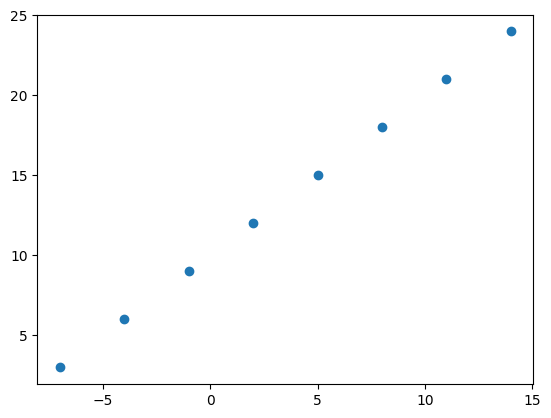

In [125]:
import numpy as np
import matplotlib.pyplot as plt



#create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])


#visualize it
plt.scatter(X,y)

In [126]:
#Example input and output shape of regression model
house_info= tf.constant(["bedroom","bathroom","garage"])
house_price= tf.constant([91213])

house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([91213], dtype=int32)>)

In [127]:
house_info.shape

TensorShape([3])

In [128]:
tf.random.set_seed(42)



model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)



model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 322ms/step - loss: 7.7486 - mae: 7.7486
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 7.6161 - mae: 7.6161
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 7.4850 - mae: 7.4850
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 7.4794 - mae: 7.4794
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 7.4738 - mae: 7.4738


In [129]:
model.predict([17.0])

1/1 [==============================] - 0s 52ms/step


array([[29.167767]], dtype=float32)

In [130]:
X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [131]:
tf.random.set_seed(42)


model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer="SGD",
              metrics=["mae"])


model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 340ms/step - loss: 19.9897 - mae: 19.9897
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 19.7085 - mae: 19.7085
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 19.4272 - mae: 19.4272
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 19.1460 - mae: 19.1460
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 18.8647 - mae: 18.8647
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 18.5835 - mae: 18.5835
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 18.3022 - mae: 18.3022
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 18.0210 - mae: 18.0210
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 17.7397 - mae: 17.7397
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 17.4585 - mae: 17.4585
Epoch 11/100
1/1 [==============================] 

In [132]:
X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [133]:
model.predict([17.0])

1/1 [==============================] - 0s 50ms/step


array([[29.517126]], dtype=float32)

In [134]:
#make a better dataset

X=np.arange(-100,100,4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [135]:
y=np.arange(-90,110,4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

# split data

In [136]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

len(X_train),len(X_test)

(40, 10)

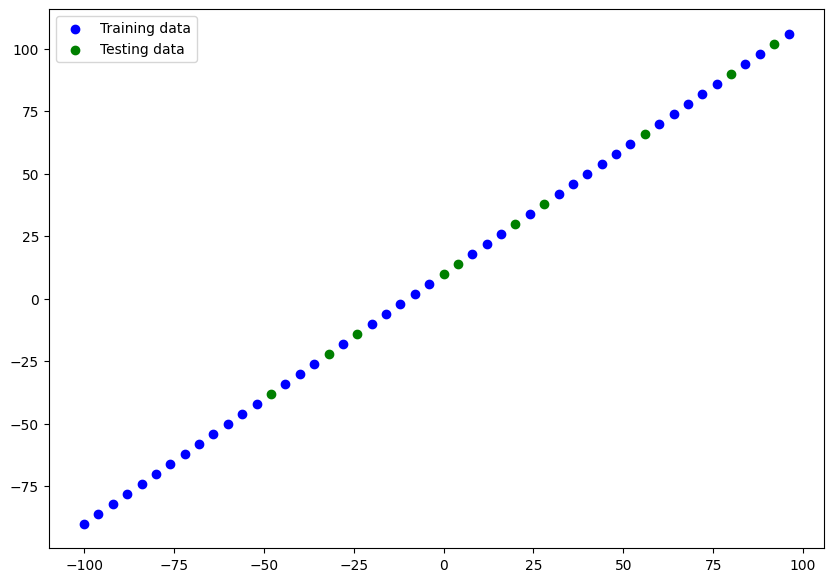

In [137]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train, c='b' ,label="Training data")

plt.scatter(X_test,y_test,c='g',label="Testing data")


plt.legend();

In [138]:
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(1 , input_shape=[1])
])


model.compile(loss="mae",
              optimizer="SGD",
              metrics="mae")

model.fit(X_train,y_train,epochs=100,verbose=0)

In [139]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


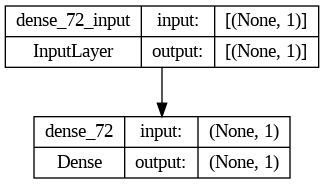

In [140]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [141]:
y_pred= model.predict(X_test)

1/1 [==============================] - 0s 38ms/step


In [142]:
y_pred

array([[-27.630066 ],
       [ 34.69695  ],
       [ 13.122214 ],
       [ 49.08011  ],
       [-18.041294 ],
       [ 56.271687 ],
       [  3.5334425],
       [  1.1362497],
       [ 17.9166   ],
       [-13.246908 ]], dtype=float32)

# plot function

In [143]:
# plot function

def plot_pred(train_data=X_train,
              train_label=y_train,
              test_data=X_test,
              test_label=y_test,
              prediction=y_pred):
  """
  Plots training data,test data and compare predictions.
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_label, c='b',label="Training data")
  plt.scatter(test_data,test_label, c='g', label="Test data")
  plt.scatter(test_data,prediction, c='r' ,label="Predictions")

  plt.legend()

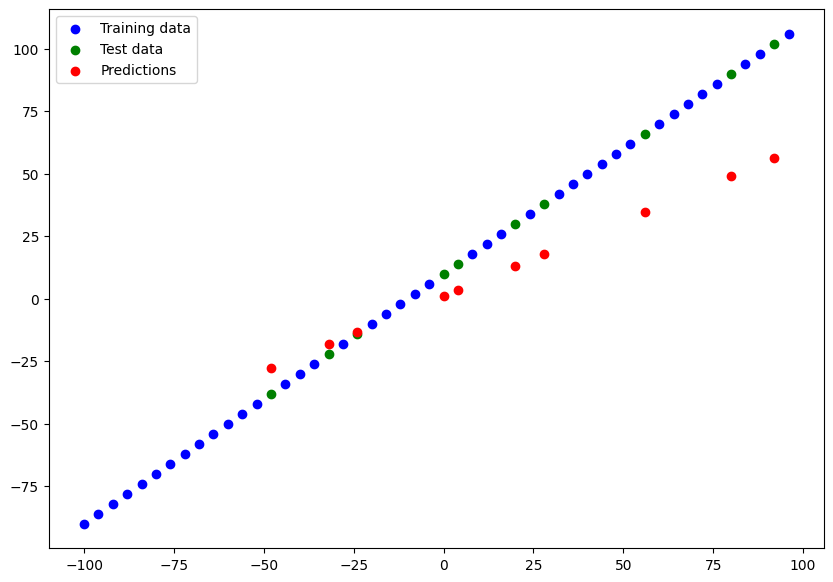

In [144]:
plot_pred(
    X_train,y_train,X_test,y_test,y_pred
)

In [145]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 93ms/step - loss: 18.9324 - mae: 18.9324


[18.932445526123047, 18.932445526123047]

In [146]:
y_test.shape,y_pred.shape

((10,), (10, 1))

In [147]:
y_pred.shape

(10, 1)

In [148]:
y_pred.squeeze().shape

(10,)

In [149]:
mse=tf.metrics.mean_squared_error(y_test,y_pred.squeeze())

mse

<tf.Tensor: shape=(), dtype=float32, numpy=574.5489>

In [150]:
mae=tf.metrics.mean_absolute_error(y_test,y_pred.squeeze())

mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.932446>

# MAE and MSE function

In [151]:
def mae(y_test,y_pred):
  """
  Calculate mean abs err between y_test and y_pred
  """
  return tf.metrics.mean_absolute_error(y_test,y_pred)

def mse(y_test,y_pred):
  """
  Calculate mean squared err between y_test and y_pred
  """
  return tf.metrics.mean_squared_error(y_test,y_pred)

# Model 1

In [152]:
#model 1
tf.random.set_seed(42)


model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1 , input_shape=[1])
])


model_1.compile(loss="mae",
              optimizer="SGD",
              metrics="mae")

model_1.fit(X_train,y_train,epochs=100,verbose=0)

In [153]:
y_pred=model_1.predict(X_test)

1/1 [==============================] - 0s 43ms/step


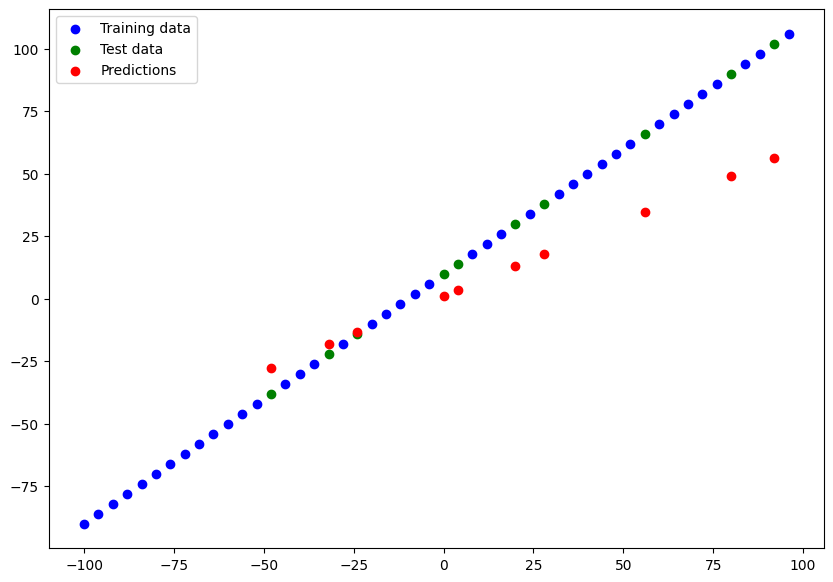

In [154]:
plot_pred(X_train,y_train,X_test,y_test,y_pred)

# model 2

In [155]:
#model 2
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1 , input_shape=[1])
])


model_2.compile(loss="mae",
              optimizer="SGD",
              metrics="mae")

In [156]:
model_2.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 12ms/step - loss: 132.3113 - mae: 132.3113
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 85.6823 - mae: 85.6823
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 36.8729 - mae: 36.8729
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 10.0722 - mae: 10.0722
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 9.2945 - mae: 9.2945
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 10.2529 - mae: 10.2529
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 9.9803 - mae: 9.9803
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 10.3196 - mae: 10.3196
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 15.6777 - mae: 15.6777
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 9.7663 - mae: 9.7663
Epoch 11/500
2/2 [==============================] - 0s 7ms/ste

In [157]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 95ms/step - loss: 18.9324 - mae: 18.9324


[18.932445526123047, 18.932445526123047]

In [158]:
y_pred_2=model.predict(X_test)

1/1 [==============================] - 0s 54ms/step


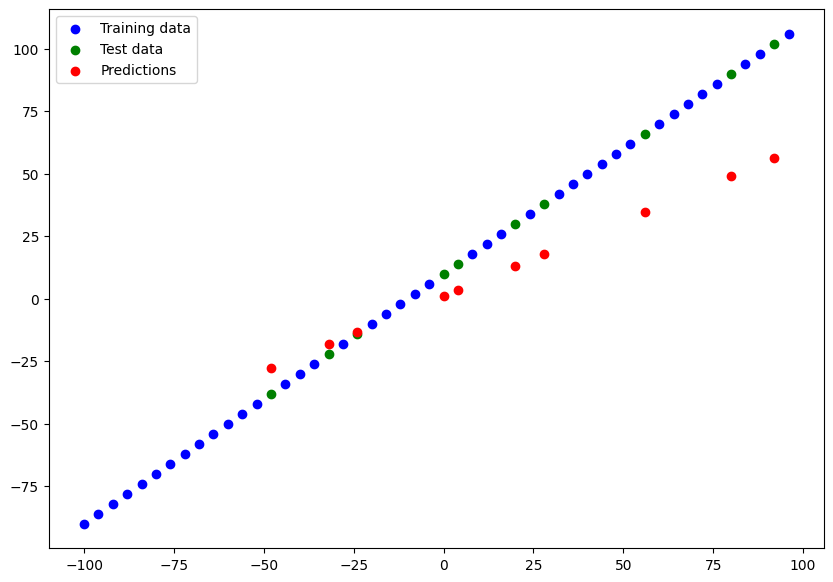

In [159]:
plot_pred(X_train,y_train,X_test,y_test,y_pred_2)

In [160]:
mae_2= mae(y_test,y_pred_2.squeeze())
mse_2=mse(y_test,y_pred_2.squeeze())
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=18.932446>,
 <tf.Tensor: shape=(), dtype=float32, numpy=574.5489>)

# Model 3

In [161]:
#model 3
tf.random.set_seed(42)


model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])


model_3.compile(loss="mae",
              optimizer="SGD",
              metrics="mae")

model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 18ms/step - loss: 45.2774 - mae: 45.2774
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 26.9198 - mae: 26.9198
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 19.9219 - mae: 19.9219
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 20.4636 - mae: 20.4636
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 23.9562 - mae: 23.9562
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 10.2520 - mae: 10.2520
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 41.2531 - mae: 41.2531
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 17.7764 - mae: 17.7764
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 40.7792 - mae: 40.7792
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 12.5299 - mae: 12.5299
Epoch 11/100
2/2 [==============================] - 0s 8m

1/1 [==============================] - 0s 44ms/step


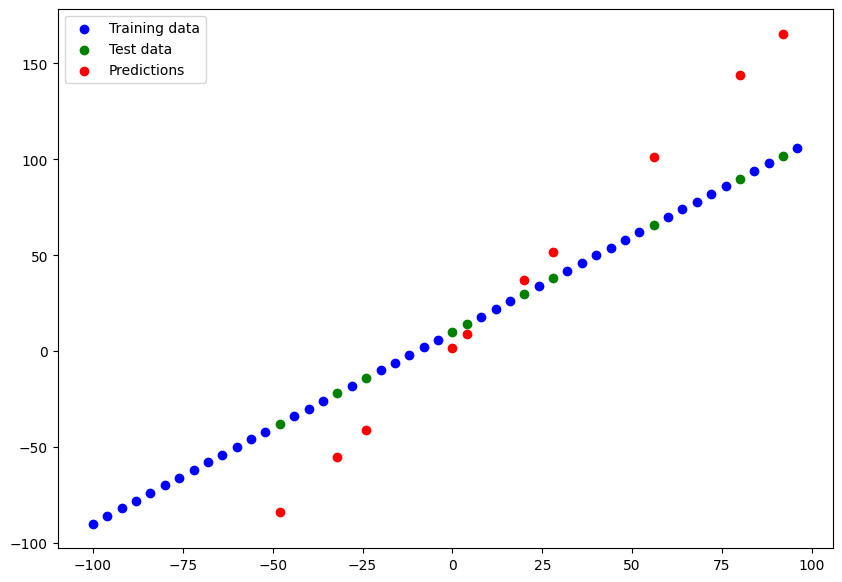

In [162]:
y_pred_3=model_3.predict(X_test)
plot_pred(prediction=y_pred_3)

In [163]:
mae_3= mae(y_test,y_pred_3.squeeze())
mse_3=mse(y_test,y_pred_3.squeeze())
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=29.34556>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1248.1344>)

In [164]:
model_3.evaluate(X_test,y_test)

1/1 [==============================] - 0s 99ms/step - loss: 29.3456 - mae: 29.3456


[29.34556007385254, 29.34556007385254]

#model 4

In [165]:
#model 4
tf.random.set_seed(42)


model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),

])


model_4.compile(loss="mae",
              optimizer="SGD",
              metrics="mae")

model_4.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 66.3307 - mae: 66.3307
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 31.7354 - mae: 31.7354
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 39.4337 - mae: 39.4337
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 34.9717 - mae: 34.9717
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 49.4854 - mae: 49.4854
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 29.4959 - mae: 29.4959
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 10.7169 - mae: 10.7169
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 43.6255 - mae: 43.6255
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 9.6794 - mae: 9.6794
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 25.6694 - mae: 25.6694
Epoch 11/100
2/2 [==============================] - 0s 7ms/s

1/1 [==============================] - 0s 52ms/step


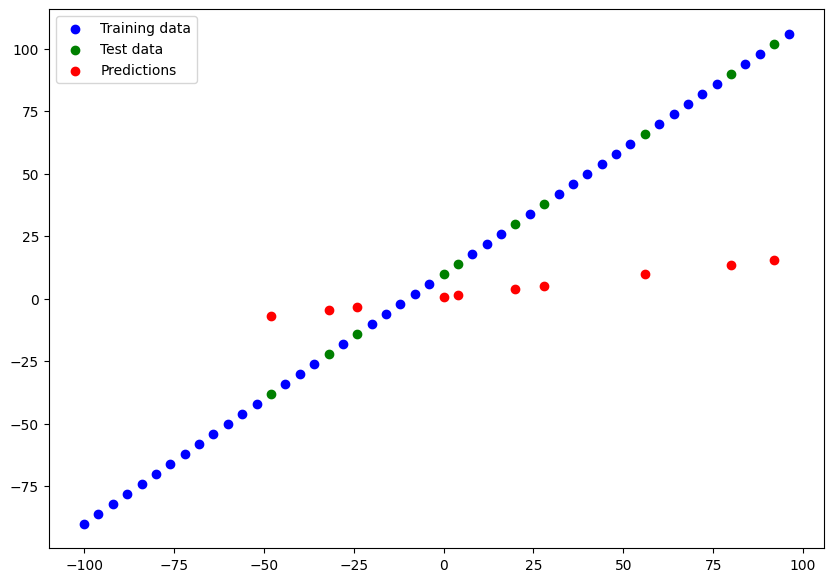

In [166]:
y_pred_4=model_4.predict(X_test)
plot_pred(prediction=y_pred_4)

In [167]:
mae_4= mae(y_test,y_pred_4.squeeze())
mse_4=mse(y_test,y_pred_4.squeeze())
mae_4,mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=35.899784>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1983.1926>)

# Model 5

In [168]:
# Model 5

tf.random.set_seed(42)


model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1),


])


model_5.compile(loss="mae",
              optimizer="SGD",
              metrics="mae")

model_5.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 92.1399 - mae: 92.1399
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 23.1799 - mae: 23.1799
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 19.0998 - mae: 19.0998
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 26.2777 - mae: 26.2777
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 27.3762 - mae: 27.3762
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3181 - mae: 10.3181
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 25.4139 - mae: 25.4139
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 20.9751 - mae: 20.9751
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 42.4263 - mae: 42.4263
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 16.9143 - mae: 16.9143
Epoch 11/100
2/2 [==============================] - 0s 6m

1/1 [==============================] - 0s 42ms/step


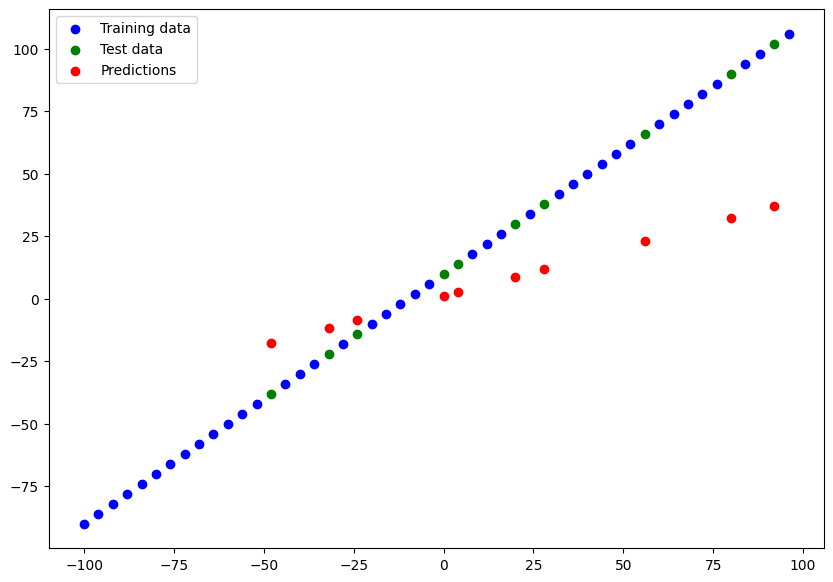

In [169]:
y_pred_5=model_5.predict(X_test)
plot_pred(prediction=y_pred_5)

In [170]:
mae_5= mae(y_test,y_pred_5.squeeze())
mse_5=mse(y_test,y_pred_5.squeeze())
mae_5,mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=26.95458>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1128.2725>)

# model 6

In [171]:
# Model 6

tf.random.set_seed(42)


model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1),


])


model_6.compile(loss="mae",
              optimizer="SGD",
              metrics="mae")

model_6.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 43.1794 - mae: 43.1794
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 35.0150 - mae: 35.0150
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 31.8583 - mae: 31.8583
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 34.8881 - mae: 34.8881
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 29.5741 - mae: 29.5741
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 29.9204 - mae: 29.9204
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 24.9408 - mae: 24.9408
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 19.6356 - mae: 19.6356
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 10.0869 - mae: 10.0869
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 9.3443 - mae: 9.3443
Epoch 11/100
2/2 [==============================] - 0s 10m

1/1 [==============================] - 0s 67ms/step


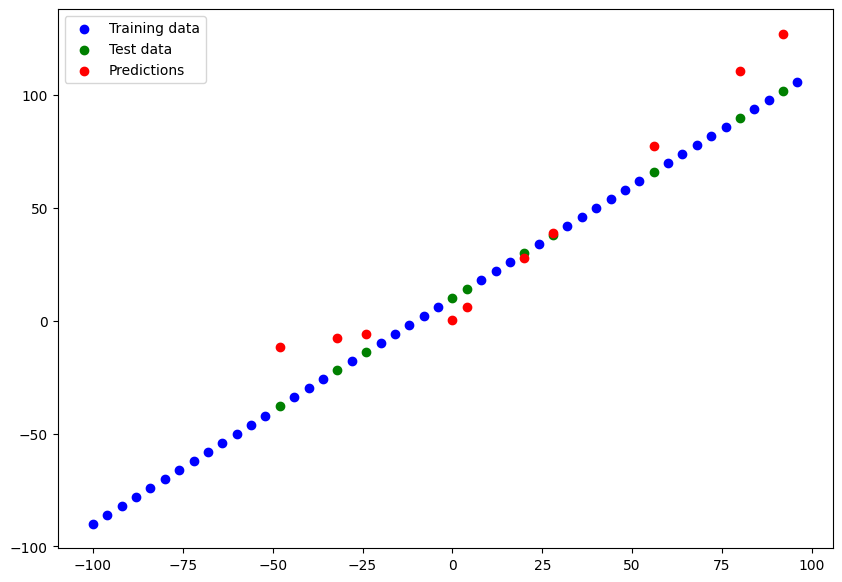

In [172]:
y_pred_6=model_6.predict(X_test)
plot_pred(prediction=y_pred_6)


In [173]:
mae_6= mae(y_test,y_pred_6.squeeze())
mse_6=mse(y_test,y_pred_6.squeeze())
mae_6,mse_6

(<tf.Tensor: shape=(), dtype=float32, numpy=12.696954>,
 <tf.Tensor: shape=(), dtype=float32, numpy=232.1261>)

#model 7

In [174]:
# Model 7

tf.random.set_seed(42)


model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="softmax"),


])


model_7.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics="mae")

model_7.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 52.3000 - mae: 52.3000
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 52.3000 - mae: 52.3000
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 52.3000 - mae: 52.3000
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 52.3000 - mae: 52.3000
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 52.3000 - mae: 52.3000
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 52.3000 - mae: 52.3000
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 52.3000 - mae: 52.3000
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 52.3000 - mae: 52.3000
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 52.3000 - mae: 52.3000
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 52.3000 - mae: 52.3000
Epoch 11/100
2/2 [==============================] - 0s 7m

# Comparision

In [175]:
model_result=[
              ["model_2",mae_2,mse_2],
              ["model_3",mae_3,mse_3],
              ["model_4",mae_4,mse_4],
              ["model_5",mae_5,mse_5],
              ["model_6",mae_6,mse_6],
            ]

In [176]:
import pandas as pd
all_results=pd.DataFrame(model_result,columns=["model","mae","mse"])

In [177]:
all_results

,model,mae,mse
0,model_2,"tf.Tensor(18.932446, shape=(), dtype=float32)","tf.Tensor(574.5489, shape=(), dtype=float32)"
1,model_3,"tf.Tensor(29.34556, shape=(), dtype=float32)","tf.Tensor(1248.1344, shape=(), dtype=float32)"
2,model_4,"tf.Tensor(35.899784, shape=(), dtype=float32)","tf.Tensor(1983.1926, shape=(), dtype=float32)"
3,model_5,"tf.Tensor(26.95458, shape=(), dtype=float32)","tf.Tensor(1128.2725, shape=(), dtype=float32)"
4,model_6,"tf.Tensor(12.696954, shape=(), dtype=float32)","tf.Tensor(232.1261, shape=(), dtype=float32)"


In [178]:
model_6.save("best_model_hdf5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Lets build a model for larger example

In [179]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

### Read in the insurance dataset

In [180]:

i = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [181]:
i.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### turn all categorical data into numbers

In [182]:
i_one_hot=pd.get_dummies(i)
i_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


### create X and y

In [183]:
X=i_one_hot.drop("charges",axis=1)
y=i_one_hot["charges"]

In [184]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [185]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### split train and test data

In [186]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

## Models

### m1

In [187]:
tf.random.set_seed(42)


i_model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

i_model_1.compile(loss="mae",
                  optimizer="SGD",
                  metrics="mae")

i_model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8654.7129 - mae: 8654.7129
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7886.7852 - mae: 7886.7852
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7551.1577 - mae: 7551.1577
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7746.7773 - mae: 7746.7773
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7677.2900 - mae: 7677.2900
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7611.2412 - mae: 7611.2412
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7574.7490 - mae: 7574.7490
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7727.4019 - mae: 7727.4019
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7583.9771 - mae: 7583.9771
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7701.1250 - mae: 7701.1250

In [188]:
i_model_1.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8889.3438 - mae: 8889.3438


[8889.34375, 8889.34375]

### m2

In [189]:
tf.random.set_seed(42)


i_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

i_model_2.compile(loss="mae",
                  optimizer="SGD",
                  metrics="mae")

i_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8559.4238 - mae: 8559.4238
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7880.8149 - mae: 7880.8149
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7592.0454 - mae: 7592.0454
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7872.4233 - mae: 7872.4233
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7632.1938 - mae: 7632.1938
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7608.2983 - mae: 7608.2983
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7593.8794 - mae: 7593.8794
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7793.1245 - mae: 7793.1245
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7604.6890 - mae: 7604.6890
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7710.9746 - mae: 7710.9746

### m3

In [197]:
tf.random.set_seed(42)


i_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

i_model_3.compile(loss="mae",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics="mae")

i_model_3.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13284.7842 - mae: 13284.7842
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13110.7666 - mae: 13110.7666
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12753.7021 - mae: 12753.7021
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12058.1396 - mae: 12058.1396
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10903.5059 - mae: 10903.5059
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9442.3975 - mae: 9442.3975
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8130.1973 - mae: 8130.1973
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7521.5376 - mae: 7521.5376
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7427.3315 - mae: 7427.3315
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7407.7690 - mae:

### m4

In [212]:
tf.random.set_seed(42)


i_model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

i_model_4.compile(loss="mae",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics="mae")

history=i_model_4.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 11330.8477 - mae: 11330.8477
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7484.5112 - mae: 7484.5112
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7264.9907 - mae: 7264.9907
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7034.8999 - mae: 7034.8999
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 6781.7139 - mae: 6781.7139
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 6520.5889 - mae: 6520.5889
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 6393.2959 - mae: 6393.2959
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 6237.3301 - mae: 6237.3301
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 6096.7227 - mae: 6096.7227
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 5898.6387 - mae: 5898.63

### m5

In [210]:
tf.random.set_seed(42)


i_model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

i_model_5.compile(loss="mae",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics="mae")

i_model_5.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 9172.9141 - mae: 9172.9141
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7119.3804 - mae: 7119.3804
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 6576.2959 - mae: 6576.2959
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 6270.5645 - mae: 6270.5645
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 5837.5571 - mae: 5837.5571
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 5167.2451 - mae: 5167.2451
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 4310.7148 - mae: 4310.7148
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 4323.2856 - mae: 4323.2856
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 3895.9836 - mae: 3895.9836
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 3914.4604 - mae: 3914.4604

In [213]:
i_model_4.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3174.7876 - mae: 3174.7876


[3174.78759765625, 3174.78759765625]

## los curve

Text(0.5, 0, 'epochs')

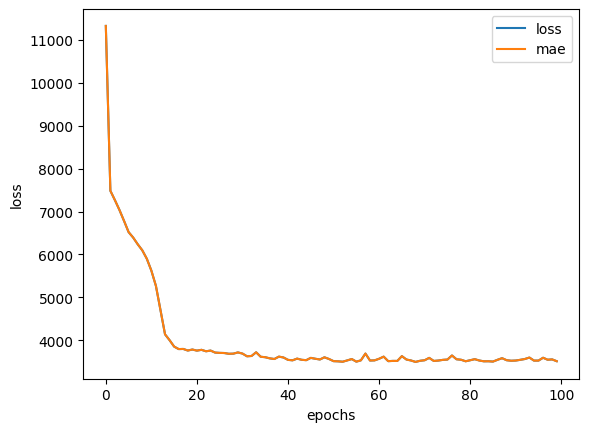

In [214]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

#Best approch to get the model

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

i = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [216]:
i.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder


column_transform= make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

#create X and y
X=i.drop("charges",axis=1)
y=i["charges"]

X_train,X_test,y_train,y_test=train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)
# Fit column transformer on the training data only (doing so on test data would result in data leakage)
column_transform.fit(X_train)


# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_nomal=column_transform.transform(X_train)
X_test_nomal=column_transform.transform(X_test)

In [218]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [220]:
X_train_nomal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [223]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_nomal.shape, X_train.shape

((1070, 11), (1070, 6))

In [5]:
tf.random.set_seed(42)

i_best_model= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

i_best_model.compile(loss="mae",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics="mae")

history=i_best_model.fit(X_train_nomal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 13215.6484 - mae: 13215.6484
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 11339.6846 - mae: 11339.6846
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 8096.7339 - mae: 8096.7339
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7578.4429 - mae: 7578.4429
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7085.6738 - mae: 7085.6738
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 6476.3848 - mae: 6476.3848
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 5528.5239 - mae: 5528.5239
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 4373.8511 - mae: 4373.8511
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 3733.5122 - mae: 3733.5122
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 3677.5105 - mae: 3677.

In [6]:
i_best_model.evaluate(X_test_nomal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3181.1609 - mae: 3181.1609


[3181.160888671875, 3181.160888671875]

Text(0, 0.5, 'los')

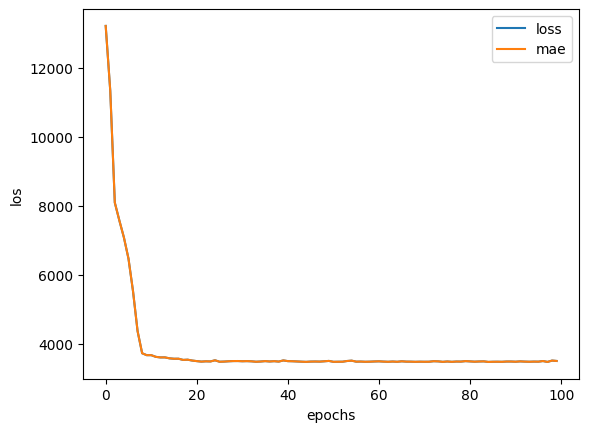

In [7]:
    pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("los")

In [8]:
i_best_model.save("best_model_for_insurance_data.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
